# Preprocessing HumanA
author: Nora Maleki (noora.maleki@gmail.com)
April 2022

## Import libraries

In [51]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import os

In [52]:
colorblind_palette = ['#5ab4ac', '#b2182b', '#2d004b', '#8c510a','#4575b4','#8073ac']
sns.set_theme(font_scale=1, palette=colorblind_palette, style='darkgrid')

## Load datasets

In [53]:
FILE_PATH = r'../../data/01_main'
PLOT_PATH = f'{FILE_PATH}/plots/preprocessing/'

os.makedirs(os.path.dirname(PLOT_PATH), exist_ok=True)

In [54]:
dataset = pd.read_csv(f'{FILE_PATH}/01_coordinates_integrated.csv', index_col=[0])
all_buildings = pd.read_csv(f'{FILE_PATH}/02_all_buildings_list.csv', index_col=[0])
avatar_info = pd.read_csv(f'{FILE_PATH}/03_avatar_info_list.csv', index_col=[0])
starting_locations = pd.read_csv(f'{FILE_PATH}/05_starting_locations_info.csv', index_col=0)
print('Done!')

Done!


### Glimpse at the data

In [55]:
dataset.head()

,SubjectID,ParticipantPosition_x,ParticipantPosition_z,PointerPosition_x,PointerPosition_z,PointerDirection_x,PointerDirection_y,PointerDirection_z,Angle,BuildingPositionLocal_x,...,vector_PartPos,vector_BuildingPos,vector_PointerPos,Vector_Participant-Building,Vector_Participant-Pointer,Dot_Pointer-Building-Participant,Magnitud_Participant-Pointer,Magnitud_Participant-Building,radians,degrees
0,365,-33.362625,-190.912018,-33.590775,-190.709625,-0.729280,0.062026,0.681399,87.005028,255.062286,...,"(-33.36262512207031, -190.91201782226562)","(255.06228637695312, -1.663042545318603)","(-33.59077453613281, -190.70962524414062)","(288.42491149902344, 189.24897527694702)","(-0.2281494140625, 0.202392578125)",-27.501387,0.304983,344.969715,1.835264,105.152855
1,365,118.412003,-62.941864,118.647705,-63.044891,0.943334,0.213414,0.254118,44.100197,255.062286,...,"(118.41200256347656, -62.941864013671875)","(255.06228637695312, -1.663042545318603)","(118.647705078125, -63.044891357421875)","(136.65028381347656, 61.27882146835327)","(0.2357025146484375, -0.10302734375)",25.895421,0.257236,149.761123,0.833633,47.763652
2,365,257.929993,-33.097687,257.598694,-32.840240,-0.831603,0.212654,0.513045,47.522392,255.062286,...,"(257.92999267578125, -33.097686767578125)","(255.06228637695312, -1.663042545318603)","(257.59869384765625, -32.840240478515625)","(-2.867706298828125, 31.43464422225952)","(-0.331298828125, 0.2574462890625)",9.042800,0.419568,31.565180,0.819211,46.937344
3,365,-242.933212,39.037964,-242.879013,38.953239,0.985110,0.081270,0.151506,1.100918,255.062286,...,"(-242.93321228027344, 39.0379638671875)","(255.06228637695312, -1.663042545318603)","(-242.87901306152344, 38.95323944091797)","(497.99549865722656, -40.7010064125061)","(0.05419921875, -0.08472442626953125)",30.439336,0.100577,499.655970,0.920139,52.720091
4,365,-320.974487,77.197166,-320.853760,77.009575,0.907607,0.056222,-0.416039,29.176662,255.062286,...,"(-320.9744873046875, 77.1971664428711)","(255.06228637695312, -1.663042545318603)","(-320.853759765625, 77.00957489013672)","(576.0367736816406, -78.8602089881897)","(0.1207275390625, -0.187591552734375)",84.337011,0.223082,581.409750,0.862902,49.440636


In [56]:
dataset.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3024 entries, 0 to 3023
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   SubjectID                         3024 non-null   int64  
 1   ParticipantPosition_x             3024 non-null   float64
 2   ParticipantPosition_z             3024 non-null   float64
 3   PointerPosition_x                 3024 non-null   float64
 4   PointerPosition_z                 3024 non-null   float64
 5   PointerDirection_x                3024 non-null   float64
 6   PointerDirection_y                3024 non-null   float64
 7   PointerDirection_z                3024 non-null   float64
 8   Angle                             3024 non-null   float64
 9   BuildingPositionLocal_x           3024 non-null   float64
 10  BuildingPositionLocal_y           3024 non-null   float64
 11  SignedAngle-+180                  3024 non-null   float64
 12  Signed

In [57]:
dataset.describe()

,SubjectID,ParticipantPosition_x,ParticipantPosition_z,PointerPosition_x,PointerPosition_z,PointerDirection_x,PointerDirection_y,PointerDirection_z,Angle,BuildingPositionLocal_x,...,PointingTargetBuildingId,avatarID,Trials,TrialID,RT,Dot_Pointer-Building-Participant,Magnitud_Participant-Pointer,Magnitud_Participant-Building,radians,degrees
count,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,...,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000
mean,5949.222222,-2.380455,14.179977,-2.105650,14.240982,-0.062420,0.049247,-0.019174,49.312632,-0.507066,...,29.076058,28.521495,55.543651,168.500000,7.694524,211.732028,0.654070,268.227781,1.084565,62.141000
std,2679.017027,174.526182,137.780203,174.422929,137.616658,0.711618,0.063007,0.694938,43.940893,201.542360,...,16.729943,16.143405,32.306260,97.010457,5.776413,8369.270787,13.277142,133.901451,0.825415,47.292774
min,365.000000,-326.886047,-191.062988,-327.157532,-191.119629,-0.999783,-0.107550,-0.999844,0.000000,-431.064392,...,1.000000,1.000000,0.000000,1.000000,0.955793,-339.516977,0.082994,15.586697,0.000718,0.041118
25%,4176.000000,-121.389214,-131.491875,-114.630356,-128.914780,-0.786176,0.011022,-0.697728,13.787071,-153.392502,...,14.000000,15.000000,28.000000,84.750000,3.419546,-3.540310,0.274503,173.853627,0.410019,23.492378
50%,6642.000000,-15.471565,33.366211,1.953339,33.455299,-0.127837,0.031453,-0.036454,36.979969,-3.306354,...,29.000000,29.000000,56.000000,168.500000,5.872636,39.073825,0.327167,243.993779,0.887194,50.832459
75%,7842.000000,123.511269,135.194962,137.915379,135.195560,0.630784,0.066026,0.674460,72.340826,151.605972,...,43.000000,43.000000,84.000000,252.250000,9.962899,76.360604,0.394744,351.346622,1.629042,93.337221
max,9472.000000,366.834778,235.882217,366.869934,235.829254,0.999977,0.741587,0.999944,179.972031,401.828735,...,59.000000,56.000000,111.000000,336.000000,30.010961,453402.151930,688.357250,728.521287,3.138685,179.833419


In [58]:
all_buildings.head()

,BuildingID,BuildingName,BuildingCenterWorld.x,BuildingCenterWorld.y,BuildingCenterWorld.z,BuildingPositionGlobal.x,BuildingPositionGlobal.y,BuildingPositionGlobal.z,BuildingPositionLocal.x,BuildingPositionLocal.y,...,BuildingLocalScale.z,BuildingForwardDirection.x,BuildingForwardDirection.y,BuildingForwardDirection.z,BuildingUpDirection.x,BuildingUpDirection.y,BuildingUpDirection.z,BuildingRightDirection.x,BuildingRightDirection.y,BuildingRightDirection.z
0,59,Crane_59,-318.127991,26.896717,-167.823914,-313.499451,1.614944,-150.514664,-313.499451,1.614944,...,1.20745,2.423655e-01,-7.277503e-09,9.701850e-01,5.915870e-08,1.000000e+00,-7.277503e-09,0.970185,-5.915870e-08,-0.242366
1,58,BasketballCourt_58,104.339996,-0.440584,-45.689999,104.339996,-3.070000,-45.689999,104.339996,-3.070000,...,1.00000,-6.614817e-01,0.000000e+00,7.499613e-01,0.000000e+00,1.000000e+00,0.000000e+00,0.749961,0.000000e+00,0.661482
2,57,Construction_57,-71.695419,0.739893,-26.238297,-71.803406,0.551138,-26.717417,-0.028043,0.005596,...,1.00000,1.490116e-07,1.000000e+00,-1.639128e-07,7.768201e-01,-2.384186e-07,-6.297227e-01,0.629723,0.000000e+00,0.776820
3,48,TaskBuilding_48,-195.637009,7.350957,-130.434052,-195.637512,-0.000015,-130.434052,-195.637512,130.434067,...,1.00000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000
4,52,TaskBuilding_52,-247.185669,4.570368,54.489395,-247.203369,2.410477,54.642479,-247.203369,-54.642483,...,1.00000,1.147317e-01,-4.165431e-07,-9.933965e-01,2.397451e-08,1.000000e+00,-4.165431e-07,-0.993397,-2.397451e-08,-0.114732


In [59]:
all_buildings.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 58
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingID                       56 non-null     int64  
 1   BuildingName                     56 non-null     object 
 2   BuildingCenterWorld.x            56 non-null     float64
 3   BuildingCenterWorld.y            56 non-null     float64
 4   BuildingCenterWorld.z            56 non-null     float64
 5   BuildingPositionGlobal.x         56 non-null     float64
 6   BuildingPositionGlobal.y         56 non-null     float64
 7   BuildingPositionGlobal.z         56 non-null     float64
 8   BuildingPositionLocal.x          56 non-null     float64
 9   BuildingPositionLocal.y          56 non-null     float64
 10  BuildingPositionLocal.z          56 non-null     float64
 11  BuildingRotationGlobal.x         56 non-null     float64
 12  BuildingRotationGlobal.y

In [60]:
all_buildings.describe()

,BuildingID,BuildingCenterWorld.x,BuildingCenterWorld.y,BuildingCenterWorld.z,BuildingPositionGlobal.x,BuildingPositionGlobal.y,BuildingPositionGlobal.z,BuildingPositionLocal.x,BuildingPositionLocal.y,BuildingPositionLocal.z,...,BuildingLocalScale.z,BuildingForwardDirection.x,BuildingForwardDirection.y,BuildingForwardDirection.z,BuildingUpDirection.x,BuildingUpDirection.y,BuildingUpDirection.z,BuildingRightDirection.x,BuildingRightDirection.y,BuildingRightDirection.z
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,...,56.000000,56.000000,5.600000e+01,56.000000,5.600000e+01,5.600000e+01,5.600000e+01,56.000000,5.600000e+01,56.000000
mean,28.839286,8.897565,6.230483,8.850133,8.891293,-0.699142,9.432957,10.172996,-15.121614,-5.762569,...,1.003704,0.092599,7.142840e-02,0.099134,2.409818e-02,8.571428e-01,-1.916140e-02,0.124996,-3.602064e-08,-0.075923
std,16.827226,192.782942,5.453986,124.984650,192.946374,3.398881,124.649720,192.638739,121.578577,24.067370,...,0.027722,0.560289,3.745127e-01,0.734892,2.720723e-01,3.530940e-01,2.654545e-01,0.777820,1.314038e-07,0.625620
min,1.000000,-336.362793,-0.791109,-255.873932,-338.406921,-6.542114,-256.052216,-338.406921,-293.247589,-150.514664,...,1.000000,-0.950611,-1.000000e+00,-1.000000,-9.998724e-01,-2.384186e-07,-9.999999e-01,-1.000000,-4.172325e-07,-0.999872
25%,14.750000,-136.218853,4.085809,-66.197618,-136.462280,-2.367606,-66.331362,-136.462280,-102.433153,-2.426545,...,1.000000,-0.632546,-3.650081e-07,-0.743667,-8.064804e-08,1.000000e+00,-3.809883e-07,-0.746625,-1.117616e-07,-0.631021
50%,28.500000,1.375929,5.244463,9.003581,1.302004,-1.151408,9.077952,2.941159,-10.794964,-1.305926,...,1.000000,0.057366,-9.727868e-08,0.169295,4.079921e-08,1.000000e+00,-1.388518e-07,0.625363,-3.162905e-08,-0.150597
75%,42.250000,143.431297,7.395142,102.297266,146.388565,0.595204,102.433146,146.388565,55.490621,0.422222,...,1.000000,0.579345,0.000000e+00,0.762951,1.512802e-07,1.000000e+00,0.000000e+00,0.774274,6.304895e-08,0.648394
max,59.000000,401.768616,31.293985,288.053894,401.828735,18.361389,293.247559,401.828735,256.052246,18.361364,...,1.207450,0.940934,1.000000e+00,1.000000,9.893244e-01,1.000000e+00,9.417416e-01,1.000000,1.851118e-07,0.989324


In [61]:
avatar_info.head()

,AvatarID,AvatarName,AvatarCenterWorld.x,AvatarCenterWorld.y,AvatarCenterWorld.z,AvatarPositionGlobal.x,AvatarPositionGlobal.y,AvatarPositionGlobal.z,AvatarPositionLocal.x,AvatarPositionLocal.y,...,AvatarLocalScale.z,AvatarForwardDirection.x,AvatarForwardDirection.y,AvatarForwardDirection.z,AvatarUpDirection.x,AvatarUpDirection.y,AvatarUpDirection.z,AvatarRightDirection.x,AvatarRightDirection.y,AvatarRightDirection.z
0,2,02_Cma,-147.664993,3.072653,67.390167,-147.646744,2.345342,67.389999,-351.640015,6.398831,...,1.0,0.000000,0.0,1.000000,0.0,1.0,0.0,1.000000,0.0,0.000000
1,42,42_Sa,65.630707,-1.885010,-52.687607,65.613266,-2.612321,-52.674149,-138.380005,1.441168,...,1.0,-0.605179,0.0,-0.796090,0.0,1.0,0.0,-0.796090,0.0,0.605179
2,36,36_Sa,162.001144,-0.394517,133.271271,162.000000,-1.121828,133.300003,-41.993271,2.931661,...,1.0,0.664752,0.0,0.747064,0.0,1.0,0.0,0.747064,0.0,-0.664752
3,38,38_Sa,150.833649,-1.489311,-43.709518,150.816269,-2.300489,-43.692154,-53.176998,1.753000,...,1.0,0.711973,0.0,0.702207,0.0,1.0,0.0,0.702207,0.0,-0.711973
4,41,41_Sa,92.128632,0.218283,38.293304,92.163269,-0.467581,38.295853,-111.830002,3.585908,...,1.0,0.743769,0.0,-0.668437,0.0,1.0,0.0,-0.668437,0.0,-0.743769


In [62]:
avatar_info.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 55
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   AvatarID                       56 non-null     int64  
 1   AvatarName                     56 non-null     object 
 2   AvatarCenterWorld.x            56 non-null     float64
 3   AvatarCenterWorld.y            56 non-null     float64
 4   AvatarCenterWorld.z            56 non-null     float64
 5   AvatarPositionGlobal.x         56 non-null     float64
 6   AvatarPositionGlobal.y         56 non-null     float64
 7   AvatarPositionGlobal.z         56 non-null     float64
 8   AvatarPositionLocal.x          56 non-null     float64
 9   AvatarPositionLocal.y          56 non-null     float64
 10  AvatarPositionLocal.z          56 non-null     float64
 11  AvatarRotationGlobal.x         56 non-null     float64
 12  AvatarRotationGlobal.y         56 non-null     float

In [63]:
avatar_info.describe()

,AvatarID,AvatarCenterWorld.x,AvatarCenterWorld.y,AvatarCenterWorld.z,AvatarPositionGlobal.x,AvatarPositionGlobal.y,AvatarPositionGlobal.z,AvatarPositionLocal.x,AvatarPositionLocal.y,AvatarPositionLocal.z,...,AvatarLocalScale.z,AvatarForwardDirection.x,AvatarForwardDirection.y,AvatarForwardDirection.z,AvatarUpDirection.x,AvatarUpDirection.y,AvatarUpDirection.z,AvatarRightDirection.x,AvatarRightDirection.y,AvatarRightDirection.z
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,...,56.0,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,28.500000,9.451360,-0.154723,8.906428,9.479183,-0.852688,8.787668,-194.514089,3.200802,-224.888190,...,1.0,0.152601,-0.000248,0.181139,-0.000041,0.999998,0.000191,0.181141,0.000098,-0.152601
std,16.309506,192.022522,2.171865,120.788425,191.980332,2.207004,120.734400,191.980334,2.207004,120.734400,...,0.0,0.596715,0.001783,0.777812,0.000304,0.000012,0.001847,0.777813,0.000539,0.596715
min,1.000000,-336.241150,-5.256408,-251.694504,-336.241333,-6.063000,-251.780014,-540.234619,-2.009511,-485.455872,...,1.0,-0.961716,-0.013202,-0.999927,-0.002276,0.999913,-0.003719,-0.999927,0.000000,-0.966854
25%,14.750000,-141.405403,-1.509524,-58.579079,-141.419785,-2.255122,-58.426651,-345.413055,1.798367,-292.102509,...,1.0,-0.241996,0.000000,-0.655529,0.000000,1.000000,0.000000,-0.655529,0.000000,-0.745289
50%,28.500000,2.890167,-0.333378,9.498009,2.883270,-1.067159,9.492935,-201.110001,2.986331,-224.182922,...,1.0,0.000000,0.000000,0.468661,0.000000,1.000000,0.000000,0.468661,0.000000,0.000000
75%,42.250000,147.657764,1.529099,111.972822,147.616764,0.888565,111.858717,-56.376500,4.942055,-121.817141,...,1.0,0.745289,0.000000,0.980278,0.000000,1.000000,0.000000,0.980299,0.000000,0.241999
max,56.000000,395.572296,3.703803,230.311523,395.563293,3.100000,230.184113,191.570007,7.153489,-3.491745,...,1.0,0.966854,0.001019,1.000000,0.000000,1.000000,0.013202,1.000000,0.003576,0.961709


In [64]:
starting_locations

,SpawnPointID,SpawnPointName,SpawnPointCenterWorld.x,SpawnPointCenterWorld.y,SpawnPointCenterWorld.z,SpawnPointPositionGlobal.x,SpawnPointPositionGlobal.y,SpawnPointPositionGlobal.z,SpawnPointPositionLocal.x,SpawnPointPositionLocal.y,...,SpawnPointLocalScale.z,SpawnPointForwardDirection.x,SpawnPointForwardDirection.y,SpawnPointForwardDirection.z,SpawnPointUpDirection.x,SpawnPointUpDirection.y,SpawnPointUpDirection.z,SpawnPointRightDirection.x,SpawnPointRightDirection.y,SpawnPointRightDirection.z
0,9,SP_TaskBuilding_9,366.741425,-1.029061,109.221771,366.741425,-1.029061,109.221771,366.730011,-1.810000,...,1.0,0.634623,2.325984e-04,0.772822,-2.700125e-03,0.999995,1.916310e-03,0.772817,3.302850e-03,-0.634621
1,30,SP_TaskBuilding_30,38.822807,0.351428,53.957973,38.822807,0.351428,53.957973,38.820000,0.350000,...,1.0,0.011997,-1.883786e-03,0.999926,-2.700125e-03,0.999995,1.916310e-03,0.999924,2.722915e-03,-0.011992
2,38,SP_TaskBuilding_38,-54.884190,-0.080298,235.924225,-54.884186,-0.080298,235.924240,-54.900002,0.520000,...,1.0,-0.919156,-1.727029e-03,-0.393891,-2.700125e-03,0.999995,1.916310e-03,-0.393885,-2.824940e-03,0.919155
3,7,SP_TaskBuilding_7,-185.620300,-0.395362,-159.597656,-185.620300,-0.395362,-159.597656,-185.610001,-0.200000,...,1.0,-0.500830,3.063527e-04,-0.865546,-2.700125e-03,0.999995,1.916310e-03,-0.865542,-3.296827e-03,0.500826
4,29,SP_TaskBuilding_29,30.083309,-0.475717,177.916245,30.083307,-0.475717,177.916245,30.070000,-0.216000,...,1.0,0.166026,2.101680e-03,-0.986119,-3.791834e-03,0.999992,1.492841e-03,-0.986114,-3.491349e-03,-0.166033
5,20,SP_TaskBuilding_20,195.920258,-1.826742,-80.497787,195.920258,-1.826742,-80.497787,195.919998,-2.510000,...,1.0,-0.635811,-3.195868e-03,0.771838,-2.700125e-03,0.999995,1.916310e-03,0.771840,8.656483e-04,0.635816
6,34,SP_TaskBuilding_34,-46.292664,0.974889,151.395493,-46.292664,0.974889,151.395477,-46.299999,1.390000,...,1.0,0.404591,2.844915e-03,-0.914493,-2.700125e-03,0.999995,1.916310e-03,-0.914494,-1.693924e-03,-0.404597
7,43,SP_TaskBuilding_43,-145.235855,0.976016,-40.267723,-145.235855,0.976016,-40.267727,-145.229996,1.291000,...,1.0,0.683276,3.244148e-03,-0.730153,-2.700125e-03,0.999995,1.916310e-03,-0.730155,-6.621348e-04,-0.683281
8,45,SP_TaskBuilding_45,-142.188049,-1.789833,-184.783508,-142.188049,-1.789833,-184.783508,-142.179993,-1.760000,...,1.0,-0.525191,2.126690e-04,-0.850984,-2.700125e-03,0.999995,1.916310e-03,-0.850980,-3.304193e-03,0.525188
9,25,SP_TaskBuilding_25,103.361137,-4.799697,-182.246994,103.361137,-4.799697,-182.246994,103.360001,-5.428000,...,1.0,-0.199725,1.338425e-03,-0.979851,-2.700125e-03,0.999995,1.916310e-03,-0.979849,-3.028455e-03,0.199720


In [65]:
starting_locations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 27
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SpawnPointID                       28 non-null     int64  
 1   SpawnPointName                     28 non-null     object 
 2   SpawnPointCenterWorld.x            28 non-null     float64
 3   SpawnPointCenterWorld.y            28 non-null     float64
 4   SpawnPointCenterWorld.z            28 non-null     float64
 5   SpawnPointPositionGlobal.x         28 non-null     float64
 6   SpawnPointPositionGlobal.y         28 non-null     float64
 7   SpawnPointPositionGlobal.z         28 non-null     float64
 8   SpawnPointPositionLocal.x          28 non-null     float64
 9   SpawnPointPositionLocal.y          28 non-null     float64
 10  SpawnPointPositionLocal.z          28 non-null     float64
 11  SpawnPointRotationGlobal.x         28 non-null     float64
 

In [66]:
starting_locations.describe()

,SpawnPointID,SpawnPointCenterWorld.x,SpawnPointCenterWorld.y,SpawnPointCenterWorld.z,SpawnPointPositionGlobal.x,SpawnPointPositionGlobal.y,SpawnPointPositionGlobal.z,SpawnPointPositionLocal.x,SpawnPointPositionLocal.y,SpawnPointPositionLocal.z,...,SpawnPointLocalScale.z,SpawnPointForwardDirection.x,SpawnPointForwardDirection.y,SpawnPointForwardDirection.z,SpawnPointUpDirection.x,SpawnPointUpDirection.y,SpawnPointUpDirection.z,SpawnPointRightDirection.x,SpawnPointRightDirection.y,SpawnPointRightDirection.z
count,28.00000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,...,28.0,28.000000,28.000000,28.000000,2.800000e+01,28.000000,2.800000e+01,28.000000,28.000000,28.000000
mean,29.50000,-2.383237,-0.709571,14.352128,-2.383237,-0.709571,14.352127,-2.386105,-0.675629,14.353289,...,1.0,-0.233701,-0.002826,-0.003459,-3.297123e-03,0.999912,4.080246e-03,-0.003376,-0.000956,0.233715
std,17.64569,177.731511,1.972548,140.328744,177.731510,1.972548,140.328746,177.727034,2.395919,140.327827,...,0.0,0.534446,0.012823,0.833415,3.518654e-03,0.000439,1.191470e-02,0.833505,0.003038,0.534452
min,1.00000,-326.726471,-4.799697,-190.505417,-326.726471,-4.799697,-190.505432,-326.720001,-5.428000,-190.500000,...,1.0,-0.919156,-0.067415,-0.986119,-2.102448e-02,0.997674,-1.627830e-10,-0.986114,-0.010114,-0.703647
25%,17.00000,-121.291481,-1.900057,-131.151398,-121.291475,-1.900057,-131.151398,-121.284998,-2.412500,-131.139996,...,1.0,-0.641869,-0.002062,-0.755909,-2.700125e-03,0.999995,1.916310e-03,-0.755906,-0.003268,-0.050502
50%,32.00000,-15.450604,-0.552892,33.614385,-15.450604,-0.552892,33.614386,-15.449999,-0.910000,33.600171,...,1.0,-0.473126,-0.000481,-0.406772,-2.700125e-03,0.999995,1.916310e-03,-0.406766,-0.000759,0.473315
75%,43.25000,123.432852,0.780412,135.329144,123.432846,0.780412,135.329144,123.431021,1.023925,135.345005,...,1.0,0.050504,0.000364,0.828546,-2.700125e-03,0.999995,1.916310e-03,0.828546,0.001307,0.641872
max,58.00000,366.741425,2.588058,235.924225,366.741425,2.588058,235.924240,366.730011,3.320000,235.919998,...,1.0,0.703650,0.003257,0.999972,-1.324667e-10,1.000000,6.484631e-02,0.999970,0.003303,0.919155


Check for the number of participants

In [67]:
subj_ids = dataset.SubjectID.unique()
print(f' Subject IDs: {subj_ids}\n',
      f'Number of participants: {len(subj_ids)}')

 Subject IDs: [ 365 3572 4176 5741 6642 7264 7842 8469 9472]
 Number of participants: 9


## Clean dataframes

Remove redundant variables

In [68]:
df_cleaned = dataset.drop(columns=[
    'AvatarPresence',
    'meaningfulBuilding',
    'AvatarPresenceCategory',
    'Context',
    'PointingTargetCondition',
    'BuildingPositionLocal_x',
    'BuildingPositionLocal_y',
    'BuildingPositionLocal_z',
    'PointingTargetIndex',
    'PointerDirection_y',
    'vector_PartPos',
    'vector_BuildingPos',
    'vector_PointerPos',
    'Vector_Participant-Building',
    'Vector_Participant-Pointer',
    'Dot_Pointer-Building-Participant',
    'Magnitud_Participant-Pointer',
    'Magnitud_Participant-Building',
    'Angle',
    'SignedAngle-+180',
    'SignedAngle360',
    'Trials',
    'DistanceToParticipant',
    'radians',
    'degrees',
    'PointingTargetId'
])

df_cleaned.head()

,SubjectID,ParticipantPosition_x,ParticipantPosition_z,PointerPosition_x,PointerPosition_z,PointerDirection_x,PointerDirection_z,PointingTargetName,PointingTargetBuildingId,Agent,avatarID,meaningful,TrialID,ImageName,TimeDelta,RT,TimeOut,TimeStampBegin,TimeStampEnd
0,365,-33.362625,-190.912018,-33.590775,-190.709625,-0.729280,0.681399,01_CmA_0_14,14,True,1,True,29,01_CmA,0 days 00:00:07.635420416,7.635421,False,2021-11-18 10:26:39.660960000,2021-11-18 10:26:47.296380416
1,365,118.412003,-62.941864,118.647705,-63.044891,0.943334,0.254118,01_CmA_0_14,14,True,1,True,102,01_CmA,0 days 00:00:03.853917952,3.853918,False,2021-11-18 10:34:18.716167680,2021-11-18 10:34:22.570085632
2,365,257.929993,-33.097687,257.598694,-32.840240,-0.831603,0.513045,01_CmA_0_14,14,True,1,True,155,01_CmA,0 days 00:00:03.418430208,3.418430,False,2021-11-18 10:40:28.512252160,2021-11-18 10:40:31.930682368
3,365,-242.933212,39.037964,-242.879013,38.953239,0.985110,0.151506,01_CmA_0_14,14,True,1,True,223,01_CmA,0 days 00:00:04.257166592,4.257167,False,2021-11-18 10:47:55.246826496,2021-11-18 10:47:59.503993088
4,365,-320.974487,77.197166,-320.853760,77.009575,0.907607,-0.416039,01_CmA_0_14,14,True,1,True,303,01_CmA,0 days 00:00:02.474542336,2.474542,False,2021-11-18 11:08:19.997678080,2021-11-18 11:08:22.472220416


Join `building center` values to the df_cleaned

In [69]:
df_cleaned = (
    pd.merge(
    df_cleaned,
    all_buildings[['BuildingID', 'BuildingCenterWorld.x', 'BuildingCenterWorld.z']],
    left_on='PointingTargetBuildingId',
    right_on='BuildingID',
    how='left')
        .drop(columns=['PointingTargetBuildingId'])
)

df_cleaned.head()

,SubjectID,ParticipantPosition_x,ParticipantPosition_z,PointerPosition_x,PointerPosition_z,PointerDirection_x,PointerDirection_z,PointingTargetName,Agent,avatarID,...,TrialID,ImageName,TimeDelta,RT,TimeOut,TimeStampBegin,TimeStampEnd,BuildingID,BuildingCenterWorld.x,BuildingCenterWorld.z
0,365,-33.362625,-190.912018,-33.590775,-190.709625,-0.729280,0.681399,01_CmA_0_14,True,1,...,29,01_CmA,0 days 00:00:07.635420416,7.635421,False,2021-11-18 10:26:39.660960000,2021-11-18 10:26:47.296380416,14,227.649185,119.052856
1,365,118.412003,-62.941864,118.647705,-63.044891,0.943334,0.254118,01_CmA_0_14,True,1,...,102,01_CmA,0 days 00:00:03.853917952,3.853918,False,2021-11-18 10:34:18.716167680,2021-11-18 10:34:22.570085632,14,227.649185,119.052856
2,365,257.929993,-33.097687,257.598694,-32.840240,-0.831603,0.513045,01_CmA_0_14,True,1,...,155,01_CmA,0 days 00:00:03.418430208,3.418430,False,2021-11-18 10:40:28.512252160,2021-11-18 10:40:31.930682368,14,227.649185,119.052856
3,365,-242.933212,39.037964,-242.879013,38.953239,0.985110,0.151506,01_CmA_0_14,True,1,...,223,01_CmA,0 days 00:00:04.257166592,4.257167,False,2021-11-18 10:47:55.246826496,2021-11-18 10:47:59.503993088,14,227.649185,119.052856
4,365,-320.974487,77.197166,-320.853760,77.009575,0.907607,-0.416039,01_CmA_0_14,True,1,...,303,01_CmA,0 days 00:00:02.474542336,2.474542,False,2021-11-18 11:08:19.997678080,2021-11-18 11:08:22.472220416,14,227.649185,119.052856


Remove trials with time out true

In [70]:
len_all = len(df_cleaned)

df_cleaned = df_cleaned.query('TimeOut==False').reset_index(drop=True)

print(f'A total of {len_all - len(df_cleaned)} trial(s) are removed due to maximum time running out before the selection of the direction.')

A total of 7 trial(s) are removed due to maximum time running out before the selection of the direction.


In [71]:
df_cleaned[['ParticipantPosition_x', 'PointerPosition_x', 'PointerPosition_z', 'PointerPosition_z']].describe()

,ParticipantPosition_x,PointerPosition_x,PointerPosition_z,PointerPosition_z
count,3017.000000,3017.000000,3017.000000,3017.000000
mean,-1.995725,-2.009842,14.184885,14.184885
std,174.479918,174.375819,137.763222,137.763222
min,-326.886047,-327.157532,-191.119629,-191.119629
25%,-114.479935,-114.621323,-139.236786,-139.236786
50%,2.276962,2.017960,38.763474,38.763474
75%,138.375061,138.100739,139.825256,139.825256
max,366.834778,366.869934,235.829254,235.829254


## Enumerate starting locations

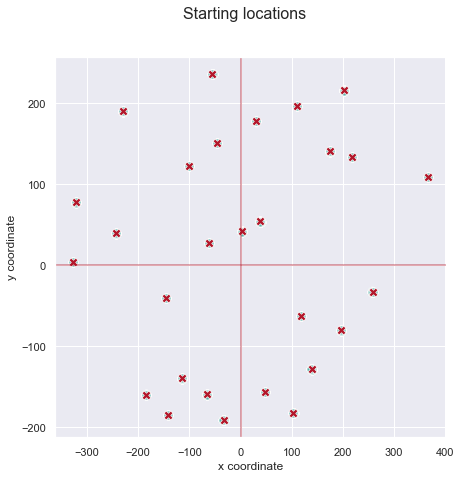

In [72]:
_, _ = plt.subplots(figsize=(7,7))

sns.scatterplot(
    data=df_cleaned,
    x='ParticipantPosition_x',
    y='ParticipantPosition_z',
    s=80
).set(xlabel='x coordinate', ylabel='y coordinate')

sns.scatterplot(
    data=starting_locations,
    x='SpawnPointPositionGlobal.x',
    y='SpawnPointPositionGlobal.z',
    s=80,
    marker='X',
    color=colorblind_palette[1]
)

plt.suptitle(t='Starting locations', size=16)
plt.axvline(x=0, color=colorblind_palette[1], alpha=.5)
plt.axhline(y=0, color=colorblind_palette[1], alpha=.5)

plt.savefig(f'{PLOT_PATH}/starting_locations_original.png', bbox_inches='tight', dpi=90)

plt.show()

In [73]:
X = df_cleaned[['ParticipantPosition_x', 'ParticipantPosition_z']].values
kmeans = KMeans(n_clusters=28, init='k-means++', random_state=0)
df_cleaned['starting_loc'] = kmeans.fit_predict(X) + 1
df_cleaned.starting_loc.describe()

count    3017.000000
mean       14.492874
std         8.080458
min         1.000000
25%         7.000000
50%        14.000000
75%        21.000000
max        28.000000
Name: starting_loc, dtype: float64

In [74]:
X_start = starting_locations[['SpawnPointCenterWorld.x', 'SpawnPointCenterWorld.z']].values
starting_locations['starting_loc'] = kmeans.predict(X_start) + 1
starting_locations.starting_loc.describe()

count    28.000000
mean     14.500000
std       8.225975
min       1.000000
25%       7.750000
50%      14.500000
75%      21.250000
max      28.000000
Name: starting_loc, dtype: float64

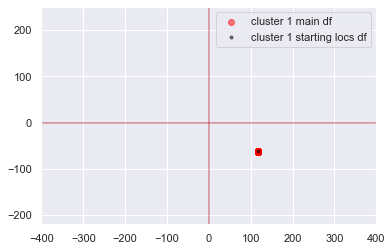

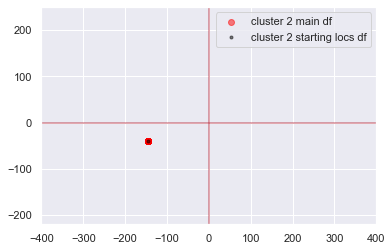

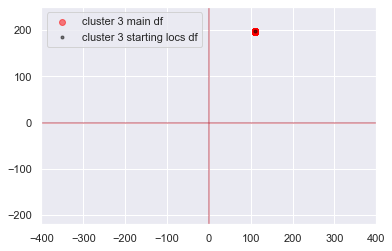

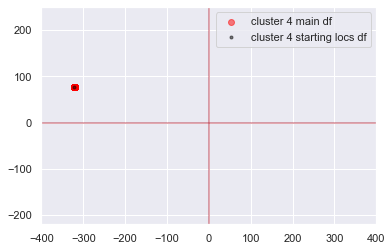

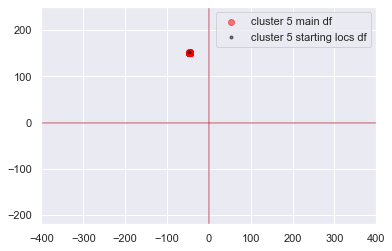

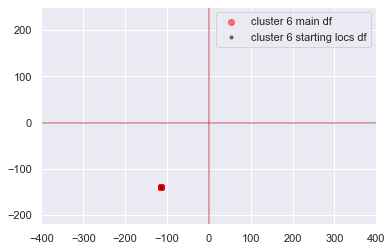

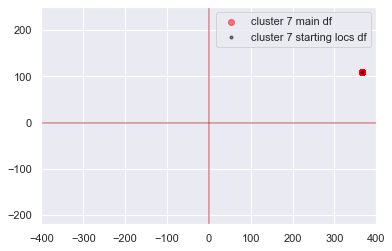

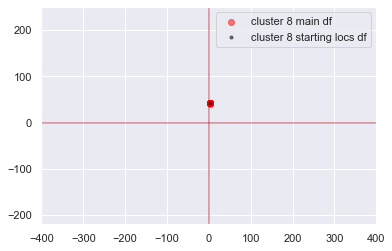

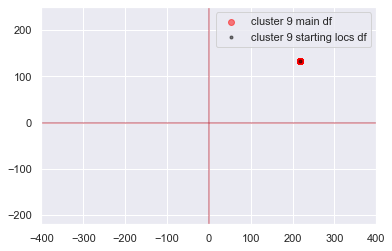

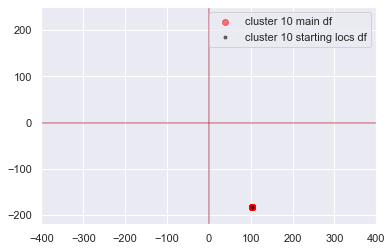

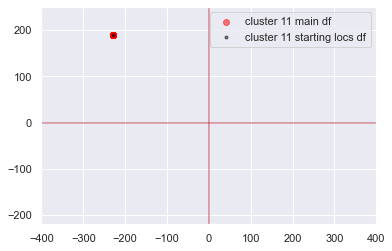

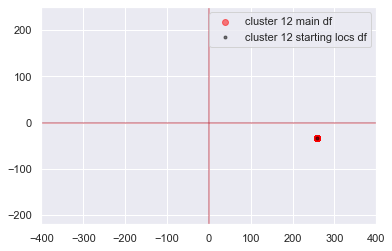

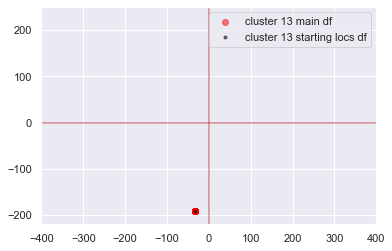

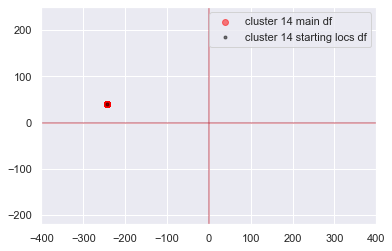

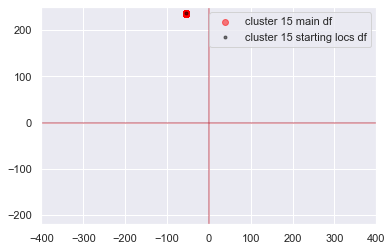

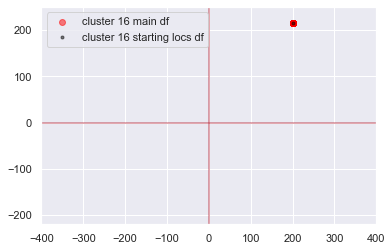

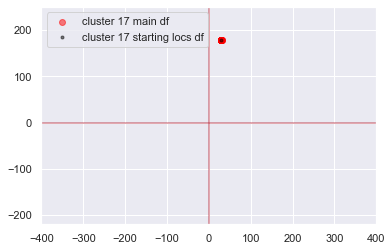

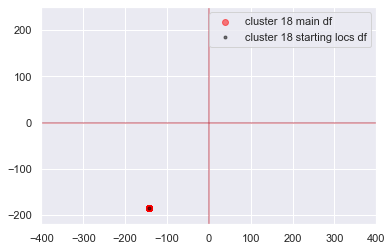

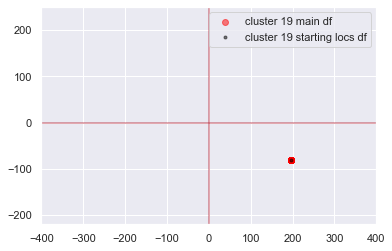

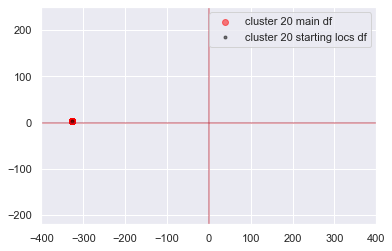

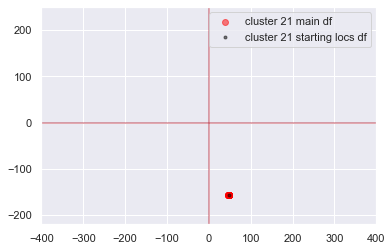

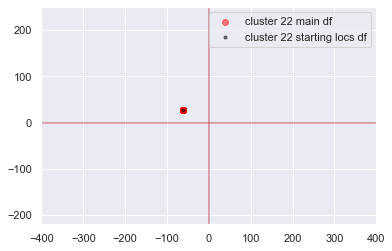

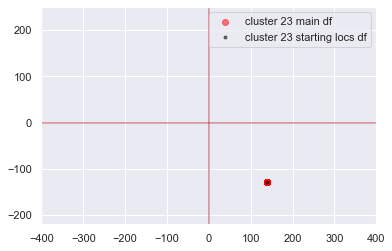

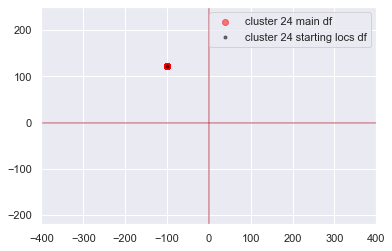

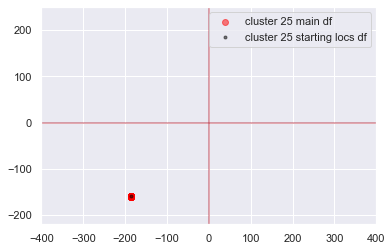

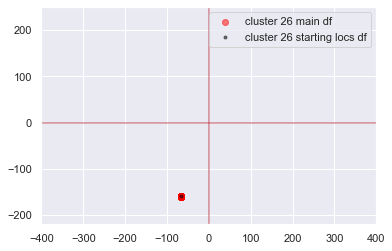

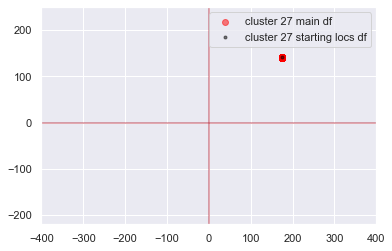

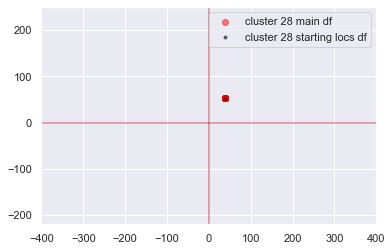

In [75]:
# fig, ax = plt.subplots(figsize=(9, 9))
y_kmeans = df_cleaned.starting_loc
y_kmeans2 = starting_locations.starting_loc

for i in range(1, len(y_kmeans.unique())+1):
    fig, ax = plt.subplots()
    ax.scatter(X[y_kmeans==i,0], X[y_kmeans==i,1], label=f'cluster {i} main df', color='red', alpha=.5)
    ax.scatter(X_start[y_kmeans2==i,0], X_start[y_kmeans2==i,1], label=f'cluster {i} starting locs df', marker='.', color='black', alpha=.5)
    # ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 8, marker='s', c='cyan', label='cluster centroid')
    plt.legend()
    plt.axvline(x=0, color=colorblind_palette[1], alpha=.5)
    plt.axhline(y=0, color=colorblind_palette[1], alpha=.5)
    plt.setp(ax, ylim=(-220, 250), xlim=(-400, 400))
    plt.show()


Join dataframes

In [76]:
starting_locations.starting_loc

0      7
1     28
2     15
3     25
4     17
5     19
6      5
7      2
8     18
9     10
10    23
11    14
12    20
13     4
14    11
15    24
16     9
17     8
18    12
19     6
20     1
21    22
22    21
23    26
24    13
25    27
26    16
27     3
Name: starting_loc, dtype: int32

In [77]:
df_cleaned = (
    pd.merge(
        df_cleaned,
        starting_locations[['starting_loc', 'SpawnPointName', 'SpawnPointID', 'SpawnPointCenterWorld.x', 'SpawnPointCenterWorld.z']],
        left_on='starting_loc',
        right_on='starting_loc',
        how='left')
)

df_cleaned.head()

,SubjectID,ParticipantPosition_x,ParticipantPosition_z,PointerPosition_x,PointerPosition_z,PointerDirection_x,PointerDirection_z,PointingTargetName,Agent,avatarID,...,TimeStampBegin,TimeStampEnd,BuildingID,BuildingCenterWorld.x,BuildingCenterWorld.z,starting_loc,SpawnPointName,SpawnPointID,SpawnPointCenterWorld.x,SpawnPointCenterWorld.z
0,365,-33.362625,-190.912018,-33.590775,-190.709625,-0.729280,0.681399,01_CmA_0_14,True,1,...,2021-11-18 10:26:39.660960000,2021-11-18 10:26:47.296380416,14,227.649185,119.052856,13,SP_TaskBuilding_37,37,-33.352345,-190.505417
1,365,118.412003,-62.941864,118.647705,-63.044891,0.943334,0.254118,01_CmA_0_14,True,1,...,2021-11-18 10:34:18.716167680,2021-11-18 10:34:22.570085632,14,227.649185,119.052856,1,SP_BasketballCourt_58,58,118.379997,-62.560001
2,365,257.929993,-33.097687,257.598694,-32.840240,-0.831603,0.513045,01_CmA_0_14,True,1,...,2021-11-18 10:40:28.512252160,2021-11-18 10:40:31.930682368,14,227.649185,119.052856,12,SP_TaskBuilding_1,1,257.839844,-32.619427
3,365,-242.933212,39.037964,-242.879013,38.953239,0.985110,0.151506,01_CmA_0_14,True,1,...,2021-11-18 10:47:55.246826496,2021-11-18 10:47:59.503993088,14,227.649185,119.052856,14,SP_TaskBuilding_52,52,-243.075241,39.462566
4,365,-320.974487,77.197166,-320.853760,77.009575,0.907607,-0.416039,01_CmA_0_14,True,1,...,2021-11-18 11:08:19.997678080,2021-11-18 11:08:22.472220416,14,227.649185,119.052856,4,SP_TaskBuilding_54,54,-321.041016,77.596870


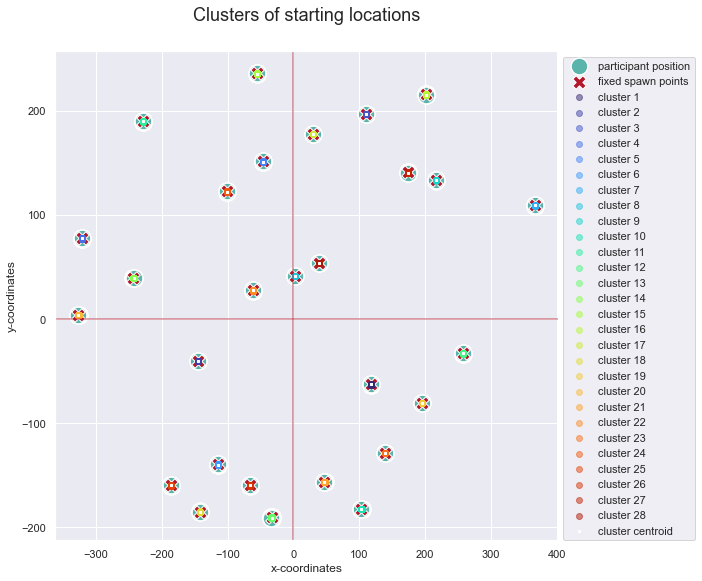

In [78]:
fig, ax = plt.subplots(figsize=(9, 9))
y_kmeans = df_cleaned.starting_loc

sns.scatterplot(
    data=df_cleaned,
    x='ParticipantPosition_x',
    y='ParticipantPosition_z',
    s=280,
    label='participant position'
).set(xlabel='x coordinate', ylabel='y coordinate')

sns.scatterplot(
    data=starting_locations,
    x='SpawnPointPositionGlobal.x',
    y='SpawnPointPositionGlobal.z',
    s=180,
    marker='X',
    color=colorblind_palette[1],
    label='fixed spawn points'
)


for i in range(1, len(y_kmeans.unique())+1):
    ax.scatter(X[y_kmeans==i,0], X[y_kmeans==i,1], label=f'cluster {i}', color=plt.cm.turbo(i/30), alpha=.5)
ax.axvline(x=0, alpha=.5, color=colorblind_palette[1])
ax.axhline(y=0, alpha=.5, color=colorblind_palette[1])
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 8, marker='s', c='white', label='cluster centroid')
ax.set_title('Clusters of starting locations', size=18, y=1.05)
ax.set_xlabel('x-coordinates')
ax.set_ylabel('y-coordinates')
ax.legend(bbox_to_anchor=(1, 1))

plt.savefig(f'{PLOT_PATH}/starting_locations_kmeans.png', bbox_inches='tight', dpi=90)

plt.show()

## Calculate angle with body `(participant position)` as origin

#### Translate the ` building center ` by ` participant's position ` to make ` body position ` the origin

In [79]:
df_cleaned['moved_target_position_x'] = df_cleaned['BuildingCenterWorld.x'] - df_cleaned.ParticipantPosition_x
df_cleaned['moved_target_position_z'] = df_cleaned['BuildingCenterWorld.z'] - df_cleaned.ParticipantPosition_z

df_cleaned.head()

,SubjectID,ParticipantPosition_x,ParticipantPosition_z,PointerPosition_x,PointerPosition_z,PointerDirection_x,PointerDirection_z,PointingTargetName,Agent,avatarID,...,BuildingID,BuildingCenterWorld.x,BuildingCenterWorld.z,starting_loc,SpawnPointName,SpawnPointID,SpawnPointCenterWorld.x,SpawnPointCenterWorld.z,moved_target_position_x,moved_target_position_z
0,365,-33.362625,-190.912018,-33.590775,-190.709625,-0.729280,0.681399,01_CmA_0_14,True,1,...,14,227.649185,119.052856,13,SP_TaskBuilding_37,37,-33.352345,-190.505417,261.011810,309.964874
1,365,118.412003,-62.941864,118.647705,-63.044891,0.943334,0.254118,01_CmA_0_14,True,1,...,14,227.649185,119.052856,1,SP_BasketballCourt_58,58,118.379997,-62.560001,109.237183,181.994720
2,365,257.929993,-33.097687,257.598694,-32.840240,-0.831603,0.513045,01_CmA_0_14,True,1,...,14,227.649185,119.052856,12,SP_TaskBuilding_1,1,257.839844,-32.619427,-30.280807,152.150543
3,365,-242.933212,39.037964,-242.879013,38.953239,0.985110,0.151506,01_CmA_0_14,True,1,...,14,227.649185,119.052856,14,SP_TaskBuilding_52,52,-243.075241,39.462566,470.582397,80.014893
4,365,-320.974487,77.197166,-320.853760,77.009575,0.907607,-0.416039,01_CmA_0_14,True,1,...,14,227.649185,119.052856,4,SP_TaskBuilding_54,54,-321.041016,77.596870,548.623672,41.855690


#### Calculate the `angle difference` between the `derived direction` and `derived target` points and the `x_axis`

In [80]:
df_cleaned['target_to_x_180'] = np.rad2deg(np.arctan2(df_cleaned.moved_target_position_z, df_cleaned.moved_target_position_x))
df_cleaned['dir_to_x_180'] = np.rad2deg(np.arctan2(df_cleaned.PointerDirection_z, df_cleaned.PointerDirection_x))

df_cleaned[['dir_to_x_180', 'target_to_x_180']].describe()

,dir_to_x_180,target_to_x_180
count,3017.000000,3017.000000
mean,-7.994695,-5.521849
std,108.174279,104.951014
min,-179.997813,-179.866720
25%,-107.651398,-99.198043
50%,-4.806071,-2.242696
75%,83.849116,74.394895
max,179.803847,179.845045


## Calculate angle deviation between the selected direction and the target

Convert the angular `difference from the x-axis` of `target` and `direction` to `360 degree`

In [81]:
df_cleaned['target_to_x_360'] = np.where(df_cleaned.target_to_x_180 < 0,
                                         360 + df_cleaned.target_to_x_180,
                                         df_cleaned.target_to_x_180
)

df_cleaned['dir_to_x_360'] = np.where(df_cleaned.dir_to_x_180 < 0,
                                      360 + df_cleaned.dir_to_x_180,
                                      df_cleaned.dir_to_x_180
)

df_cleaned[['target_to_x_360','dir_to_x_360']].describe()

,target_to_x_360,dir_to_x_360
count,3017.000000,3017.000000
mean,180.384681,177.315215
std,108.241834,100.382084
min,0.063520,0.117542
25%,82.004139,90.201706
50%,184.560408,183.942087
75%,268.891242,256.750978
max,359.773355,359.968134


## Calculate the `signed angular difference` between `selected direction` and the `target`

In [82]:
df_cleaned['final_180_angles'] = (
    ((df_cleaned.dir_to_x_360 - df_cleaned.target_to_x_360) + 180) % 360 - 180
)

df_cleaned.final_180_angles.describe()

count    3017.000000
mean       -3.427437
std        65.864053
min      -179.881808
25%       -40.507297
50%        -4.628868
75%        30.581841
max       179.983386
Name: final_180_angles, dtype: float64

## Convert the `signed angular difference` between `selected direction` and the `target` to `360 degree` angles

In [83]:
df_cleaned['final_360_angles'] = np.where(
    df_cleaned.final_180_angles < 0,
    360 + df_cleaned.final_180_angles,
    df_cleaned.final_180_angles
)

df_cleaned.final_360_angles.describe()

count    3017.000000
mean      195.962686
std       137.167835
min         0.049746
25%        46.617934
50%       248.185209
75%       329.509538
max       359.983459
Name: final_360_angles, dtype: float64

Round the angles

In [84]:
df_cleaned['rounded_180_angles'] = round(df_cleaned.final_180_angles)
df_cleaned['rounded_360_angles'] = round(df_cleaned.final_360_angles)

In [85]:
df_cleaned.head()

,SubjectID,ParticipantPosition_x,ParticipantPosition_z,PointerPosition_x,PointerPosition_z,PointerDirection_x,PointerDirection_z,PointingTargetName,Agent,avatarID,...,moved_target_position_x,moved_target_position_z,target_to_x_180,dir_to_x_180,target_to_x_360,dir_to_x_360,final_180_angles,final_360_angles,rounded_180_angles,rounded_360_angles
0,365,-33.362625,-190.912018,-33.590775,-190.709625,-0.729280,0.681399,01_CmA_0_14,True,1,...,261.011810,309.964874,49.900308,136.943970,49.900308,136.943970,87.043662,87.043662,87.0,87.0
1,365,118.412003,-62.941864,118.647705,-63.044891,0.943334,0.254118,01_CmA_0_14,True,1,...,109.237183,181.994720,59.026904,15.076639,59.026904,15.076639,-43.950265,316.049735,-44.0,316.0
2,365,257.929993,-33.097687,257.598694,-32.840240,-0.831603,0.513045,01_CmA_0_14,True,1,...,-30.280807,152.150543,101.255862,148.328125,101.255862,148.328125,47.072263,47.072263,47.0,47.0
3,365,-242.933212,39.037964,-242.879013,38.953239,0.985110,0.151506,01_CmA_0_14,True,1,...,470.582397,80.014893,9.649925,8.743356,9.649925,8.743356,-0.906569,359.093431,-1.0,359.0
4,365,-320.974487,77.197166,-320.853760,77.009575,0.907607,-0.416039,01_CmA_0_14,True,1,...,548.623672,41.855690,4.362768,-24.626282,4.362768,335.373718,-28.989050,331.010950,-29.0,331.0


In [86]:
df_cleaned = df_cleaned.rename(columns = {'SubjectID'               : 'subject_id',
                                          'ParticipantPosition_x'   : 'body_pos_x',
                                          'ParticipantPosition_z'   : 'body_pos_z',
                                          'PointerPosition_x'       : 'pointer_pos_x',
                                          'PointerPosition_z'       : 'pointer_pos_z',
                                          'PointerDirection_x'      : 'pointer_dir_x',
                                          'PointerDirection_z'      : 'pointer_dir_z',
                                          'PointingTargetName'      : 'target_game_object_name',
                                          'Agent'                   : 'avatar_presence',
                                          'avatarID'                : 'avatar_id',
                                          'TrialID'                 : 'trial_id',
                                          'ImageName'               : 'image_name',
                                          'TimeDelta'               : 'time_delta',
                                          'TimeOut'                 : 'time_out',
                                          'TimeStampBegin'          : 'timestamp_begin',
                                          'TimeStampEnd'            : 'timestamp_end',
                                          'BuildingID'              : 'building_id',
                                          'BuildingCenterWorld.x'   : 'building_center_x',
                                          'BuildingCenterWorld.z'   : 'building_center_z',
                                          'SpawnPointName'          : 'starting_loc_name',
                                          'SpawnPointID'            : 'starting_loc_id',
                                          'SpawnPointCenterWorld.x' : 'starting_loc_x',
                                          'SpawnPointCenterWorld.z' : 'starting_loc_z'
})

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3017 entries, 0 to 3016
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   subject_id               3017 non-null   int64  
 1   body_pos_x               3017 non-null   float64
 2   body_pos_z               3017 non-null   float64
 3   pointer_pos_x            3017 non-null   float64
 4   pointer_pos_z            3017 non-null   float64
 5   pointer_dir_x            3017 non-null   float64
 6   pointer_dir_z            3017 non-null   float64
 7   target_game_object_name  3017 non-null   object 
 8   avatar_presence          3017 non-null   bool   
 9   avatar_id                3017 non-null   int64  
 10  meaningful               3017 non-null   bool   
 11  trial_id                 3017 non-null   int64  
 12  image_name               3017 non-null   object 
 13  time_delta               3017 non-null   object 
 14  RT                      

In [87]:
df_cleaned.to_csv(f'{FILE_PATH}/07_preprocessed.csv', index=False)
del df_cleaned